"Embark on a comprehensive NLP journey with this Python notebook, visually exploring vector representations using GloVe, Word2Vec, and CBOW. The notebook seamlessly integrates POS and NER, providing clear explanations and screenshots of the tagging process. Additionally, it implements an RNN-based encoder/decoder model for language translation, showcasing the output with step-by-step elucidation. This all-encompassing exploration serves as a valuable guide for practitioners diving into various facets of natural language processing."

In [3]:
text =  "My name is Jayasurya with 1934014 and my native place is TamilNadu pursuing my integrated M.Sc AIML from Coimbatore institute of technology in the year 2024 currently having a CGPA of 8.00 .My technical skills are Data analysis,data preprocessing,python,nlp and computer vision and I did an intern  project named testspec generation at Robert Bosch"

# NER 

In [2]:
import spacy
spacy.download('en_core_web_sm')


In [1]:
import en_core_web_sm
NER = spacy.load("en_core_web_sm")

In [3]:
text1= NER(text)

In [ ]:
for word in text1.ents:
    print(word.text,word.label_)

Jayasuriya Easwaran PERSON
1934012 DATE
TamilNadu ORG
M.Sc AIML PERSON
Coimbatore institute of technology ORG
the year 2024 DATE
CGPA ORG
8.94 CARDINAL
University of malaya ORG


In [ ]:
displacy.render(text1,style="ent",jupyter=True)

# POS Tagger

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
text = nltk.word_tokenize(text)
nltk.pos_tag(text)

[('My', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Jayasuriya', 'NNP'),
 ('Easwaran', 'NNP'),
 ('with', 'IN'),
 ('1934012', 'CD'),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('native', 'JJ'),
 ('place', 'NN'),
 ('is', 'VBZ'),
 ('TamilNadu', 'NNP'),
 ('pursuing', 'VBG'),
 ('my', 'PRP$'),
 ('integrated', 'JJ'),
 ('M.Sc', 'NNP'),
 ('AIML', 'NNP'),
 ('from', 'IN'),
 ('Coimbatore', 'NNP'),
 ('institute', 'NN'),
 ('of', 'IN'),
 ('technology', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('year', 'NN'),
 ('2024', 'CD'),
 ('currently', 'RB'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('CGPA', 'NNP'),
 ('of', 'IN'),
 ('8.94', 'CD'),
 ('.My', 'JJ'),
 ('technical', 'JJ'),
 ('skills', 'NNS'),
 ('are', 'VBP'),
 ('Data', 'NNP'),
 ('analysis', 'NN'),
 (',', ','),
 ('data', 'NNS'),
 ('preprocessing', 'NN'),
 (',', ','),
 ('python', 'NN'),
 ('proficiency', 'NN'),
 ('and', 'CC'),
 ('computer', 'NN'),
 ('vision', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('did', 'VBD'),
 ('an', 'DT'),
 ('intern', 'NN'),
 ('project', 'NN'),
 ('

# Word2vec

In [ ]:
import nltk
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(text)
clean_tokens = [token.lower() for token in tokens if token.isalpha()]

In [ ]:

# Train a Word2Vec model on the text data
model = Word2Vec([clean_tokens], min_count=1,vector_size=76, workers=3, window=5)
word_vectors = model.wv

vectors = np.array([word_vectors[word] for word in word_vectors.key_to_index])

In [ ]:

# Reduce the dimensionality of the word vectors to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_tsne = tsne.fit_transform(vectors)


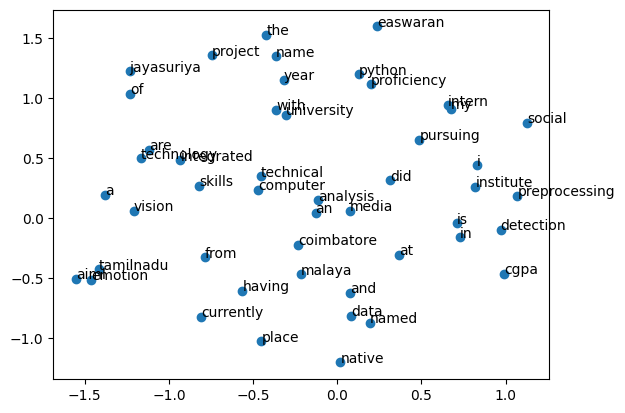

In [ ]:
# Plot the word vectors using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(word_vectors.index_to_key):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
plt.show()


# CBOW

In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import brown


In [ ]:
tokens = nltk.word_tokenize(text)
clean_tokens = [token.lower() for token in tokens if token.isalpha()]

In [ ]:
model = gensim.models.Word2Vec([clean_tokens], min_count=1, vector_size=100, workers=3, sg=0)

In [ ]:
word_vectors = model.wv


In [ ]:

vectors = np.array([word_vectors[word] for word in word_vectors.key_to_index])

In [ ]:
vectors.shape

(48, 100)

In [ ]:
type(vectors)

numpy.ndarray

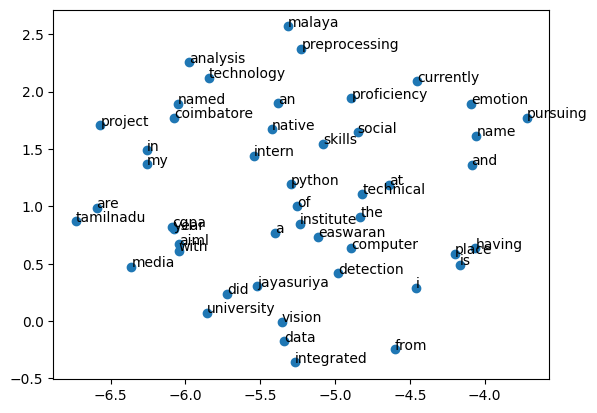

In [ ]:
# Reduce the dimensionality of the word vectors to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word vectors using a scatter plot
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(word_vectors.index_to_key):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
plt.show()


# RNN

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.3 MB/s eta 0:00:00


In [ ]:
pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

In [ ]:
model = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-en-zh")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-zh")

/usr/local/lib/python3.9/dist-packages/transformers/models/auto/modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translation = pipeline("translation_en_to_zh", model=model, tokenizer=tokenizer)

In [ ]:
translated_text = translation(text, max_length=300)[0]['translation_text']
print(translated_text)

我是1934012年的Jayasuriya Easwaran, 我原住的地方是泰米尔纳德邦, 2024年从Coimbatore技术学院 寻求我综合的M. Sc AIML, 目前拥有8.94的CGPA。 我的技术技能是数据分析、数据预处理、python熟练程度和电脑视觉,


# GLOVE

In [ ]:
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load GloVe embeddings 
glove_vectors = {}
with open('glove.6B.100d.txt', 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

In [ ]:
# Load GloVe embeddings
glove_vectors = {}
with open('glove.6B.100d.txt', 'r', encoding='utf8') as f:
    count = 0
    for line in f:
        # print(line)
        count += 1
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector
        if count == 1000:
            break

In [ ]:
# for token in clean_tokens:
#   try:
#     print(glove_vectors[token])
#   except:
#     print("end")

In [ ]:
type(glove_vectors)

dict

In [ ]:
glove_vectors['this'].shape

(100,)

In [ ]:
# import numpy as np
# from ast import literal_eval

In [ ]:
# t = literal_eval(glove_vectors)

In [ ]:
# tsne = TSNE(n_components=2, random_state=0)
# vectors_tsne = tsne.fit_transform(vectors)


In [ ]:
# Get a list of similar words based on cosine similarity
def get_similar_words(word, n=5):
    word_vector = glove_vectors.get(word)
    if word_vector is None:
        return []
    word_similarities = []
    for w, v in glove_vectors.items():
        if w == word:
            continue
        similarity = cosine_similarity([word_vector], [v])[0][0]
        word_similarities.append((w, similarity))
    word_similarities.sort(key=lambda x: x[1], reverse=True)
    return [w for w, s in word_similarities[:n]]

# Reduce dimensionality of GloVe vectors using T-SNE
tsne = TSNE(n_components=2, random_state=42)
glove_array = np.array(list(glove_vectors.values()))
glove_tsne = tsne.fit_transform(glove_array)
# glove_tsne = tsne.fit_transform(list(glove_vectors.values()))

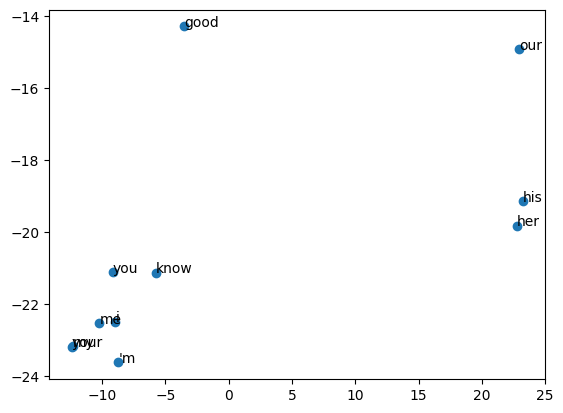

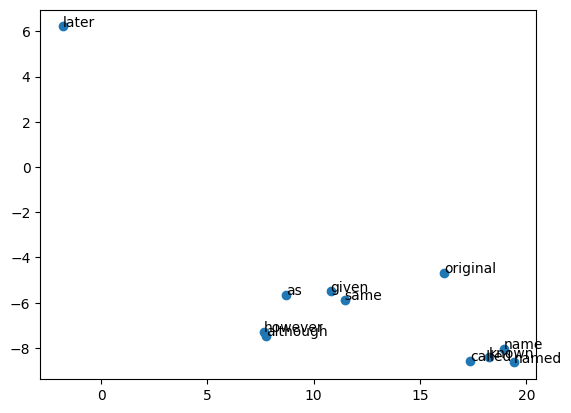

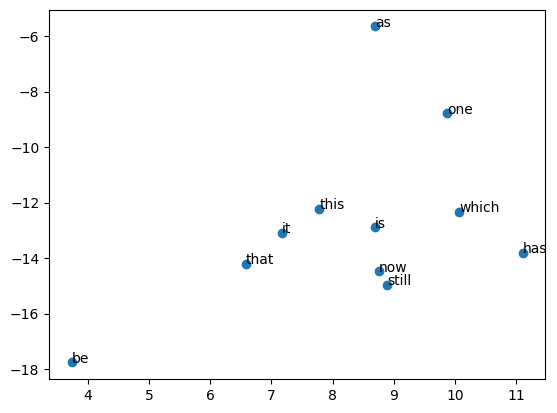

Not in sample set
Not in sample set


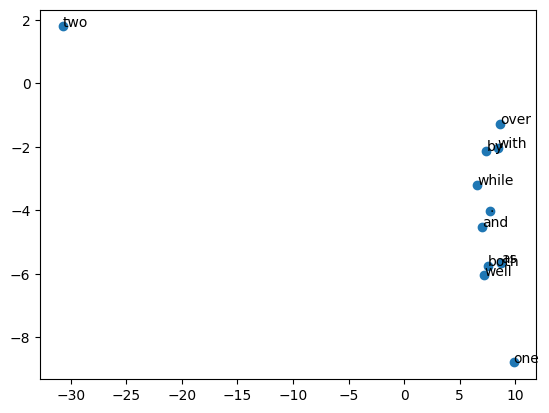

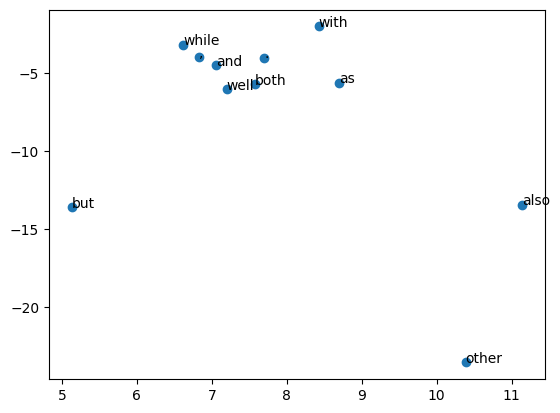

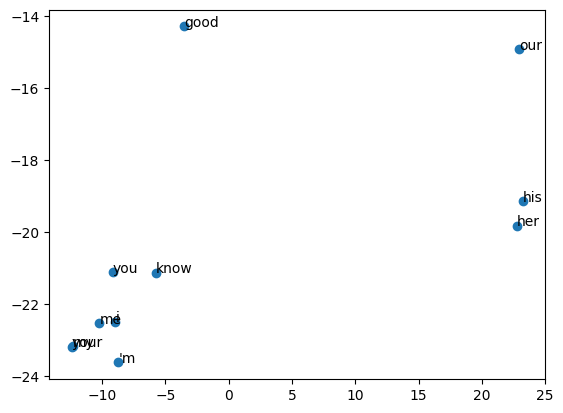

Not in sample set


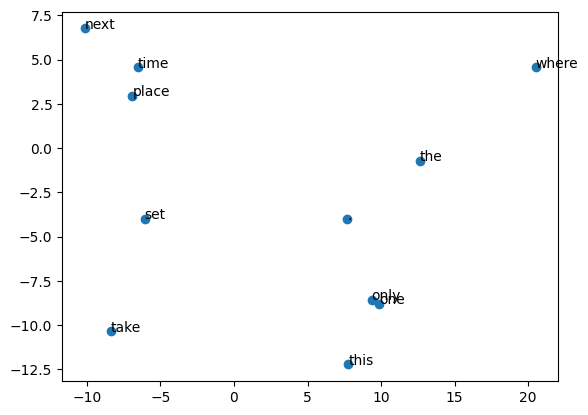

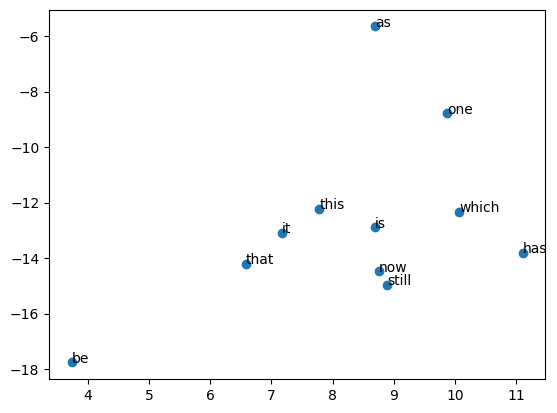

Not in sample set
Not in sample set


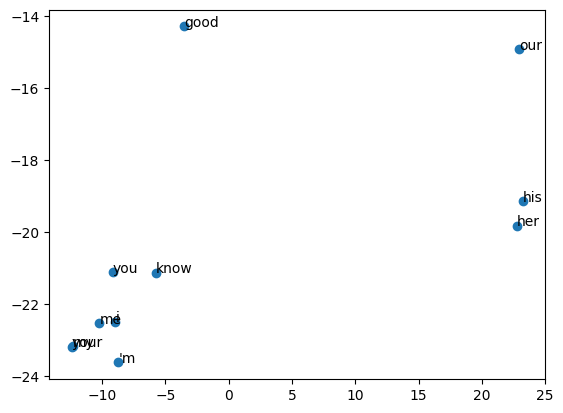

Not in sample set
Not in sample set


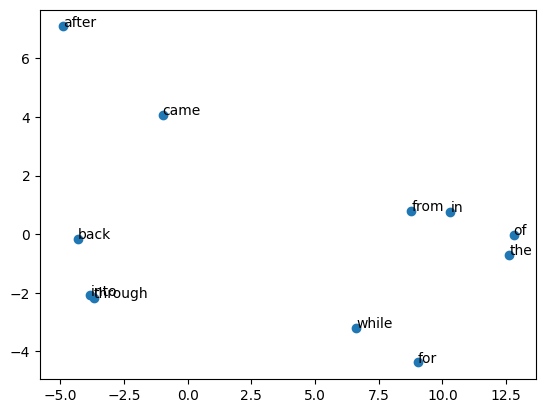

Not in sample set
Not in sample set


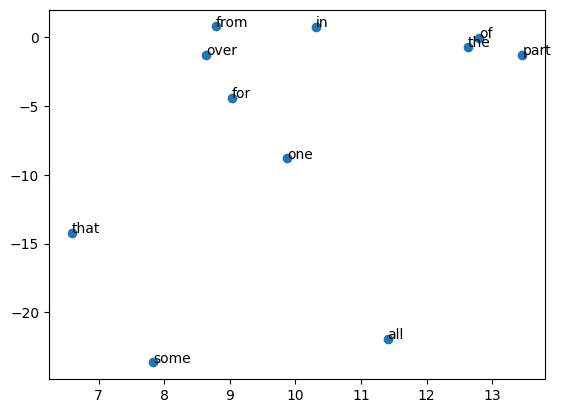

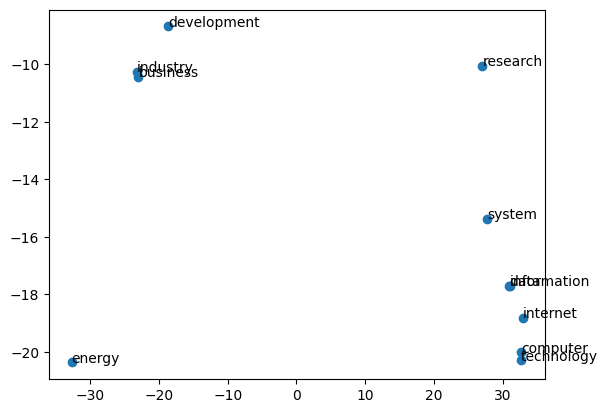

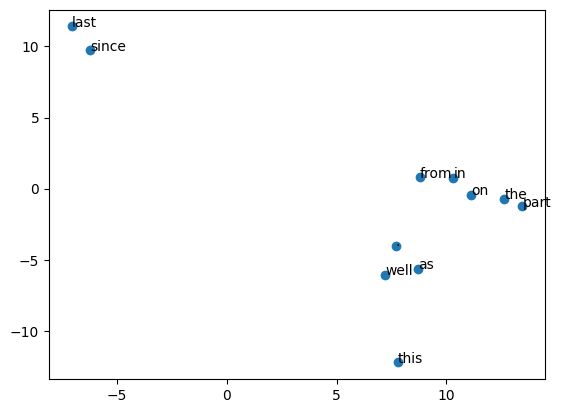

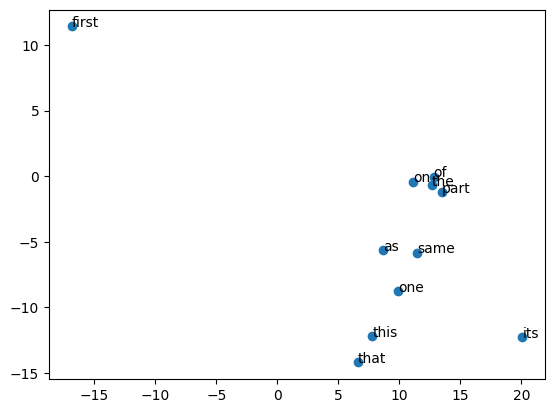

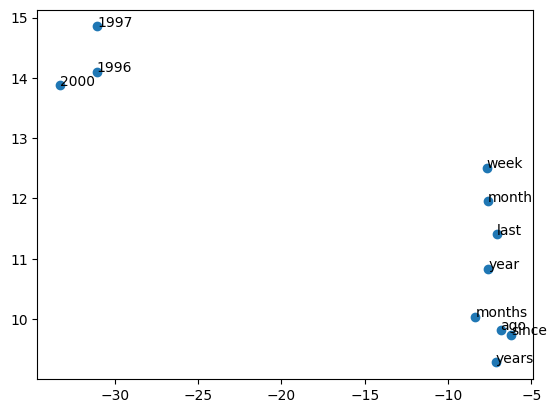

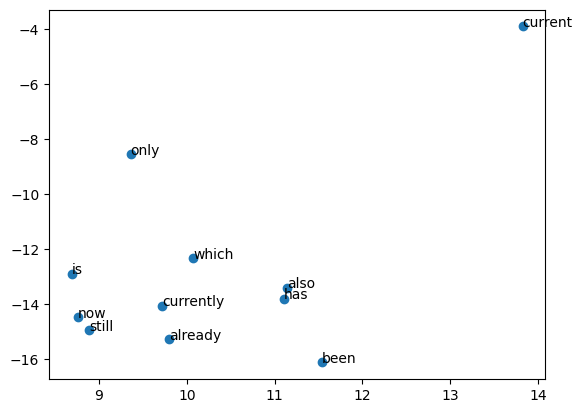

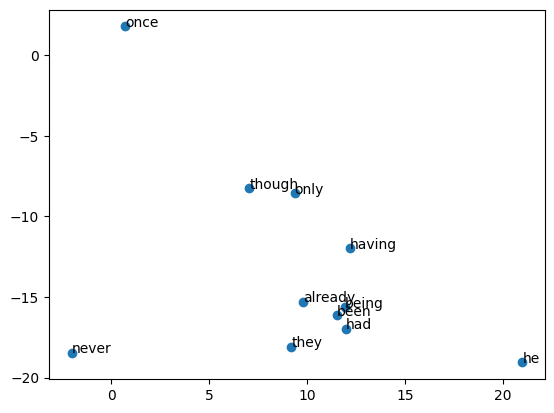

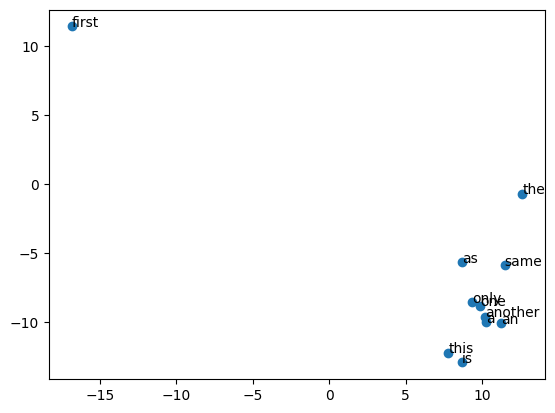

Not in sample set


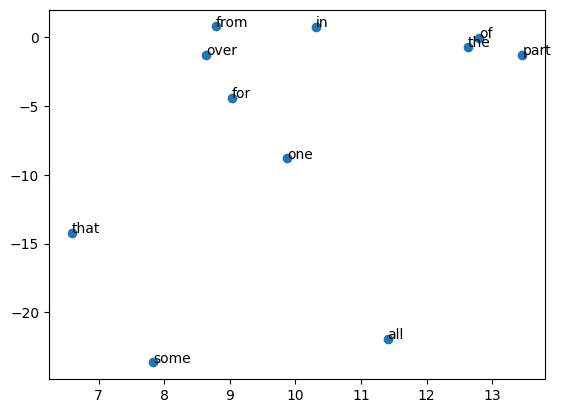

Not in sample set
Not in sample set


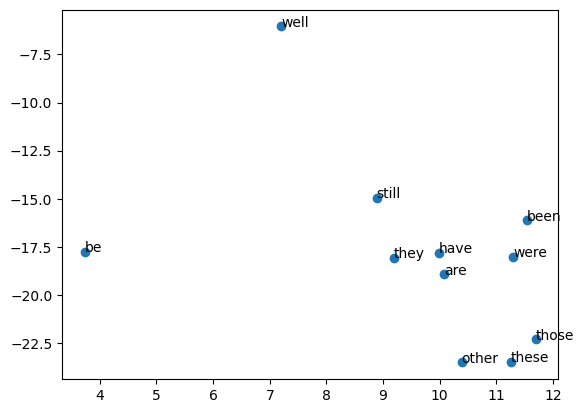

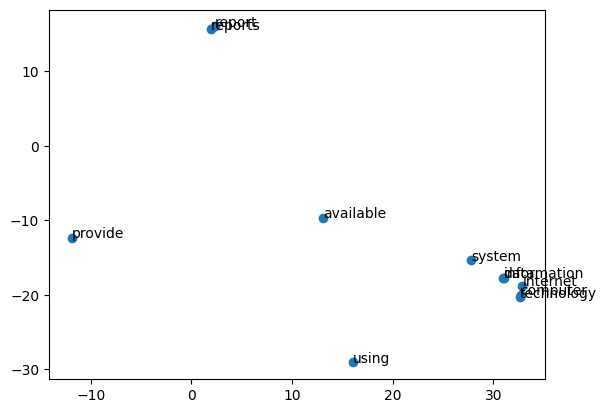

Not in sample set


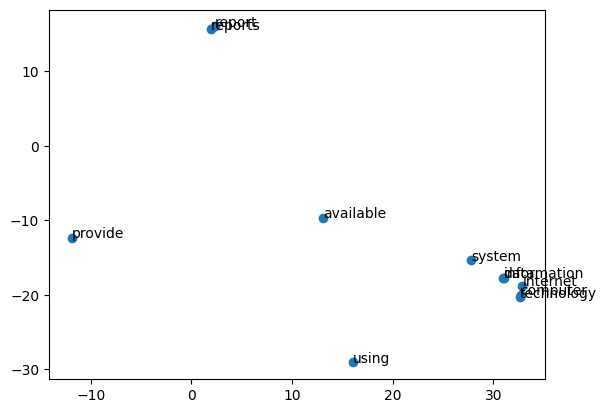

Not in sample set
Not in sample set
Not in sample set


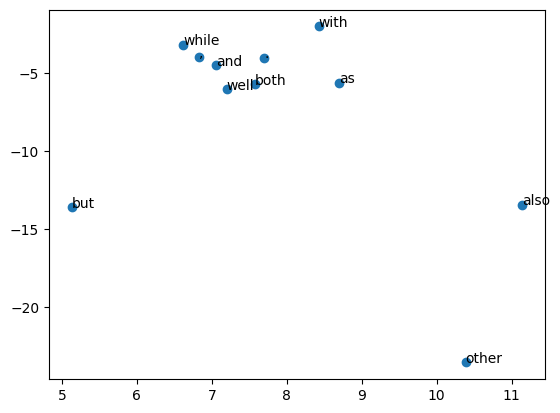

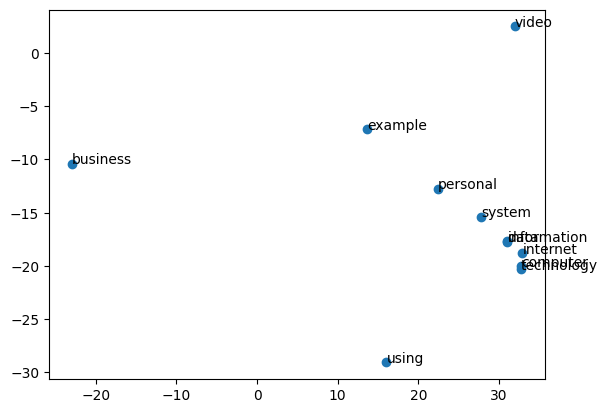

Not in sample set


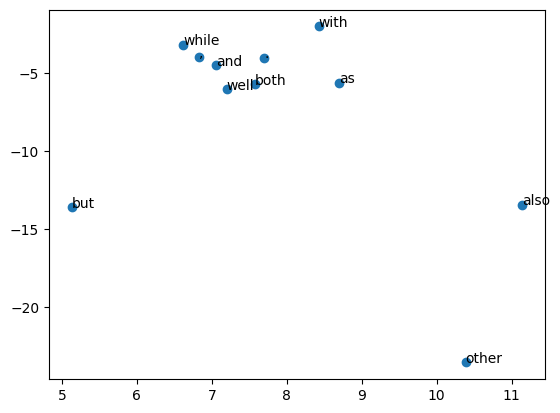

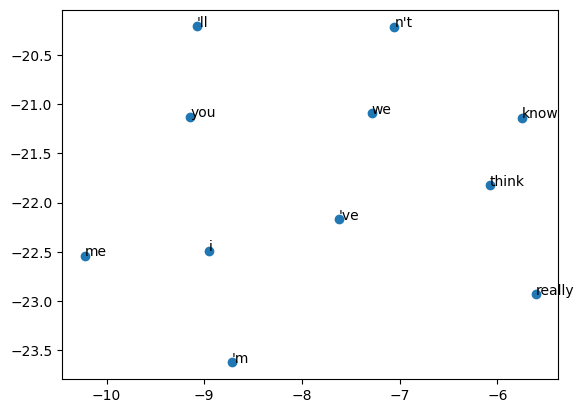

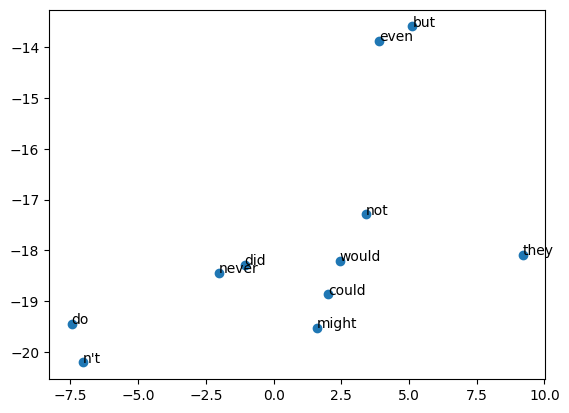

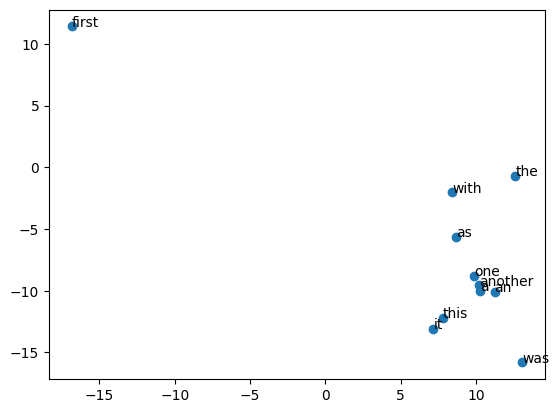

Not in sample set


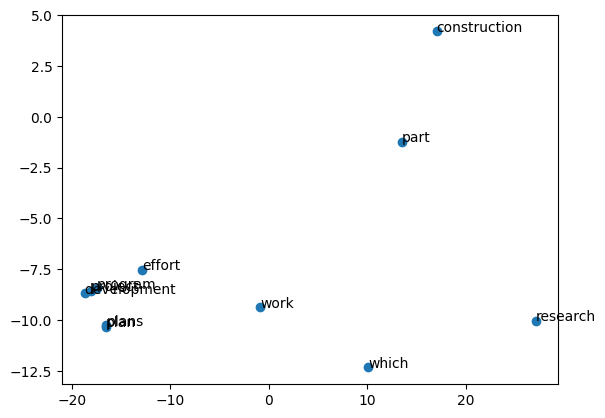

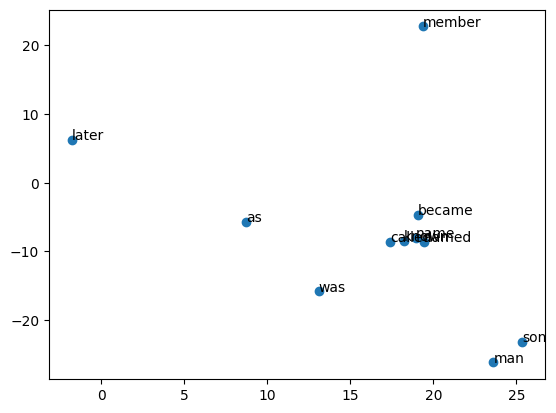

Not in sample set
Not in sample set


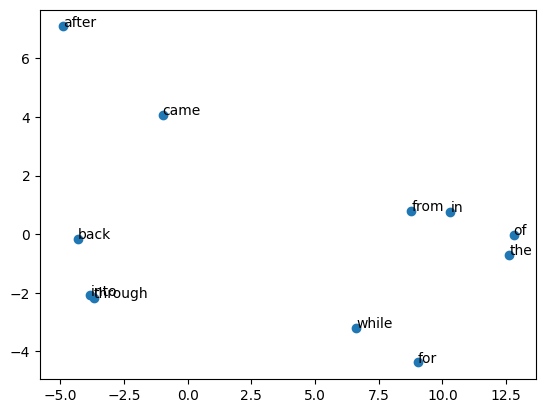

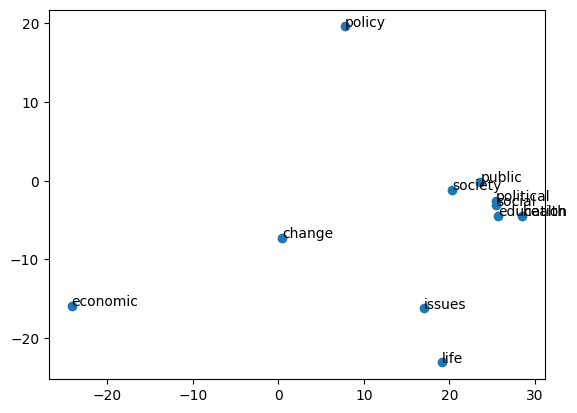

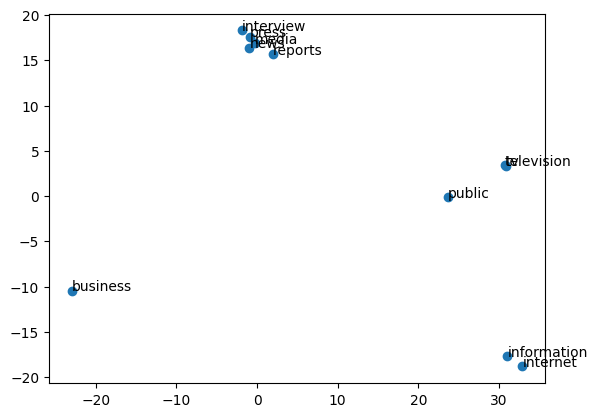

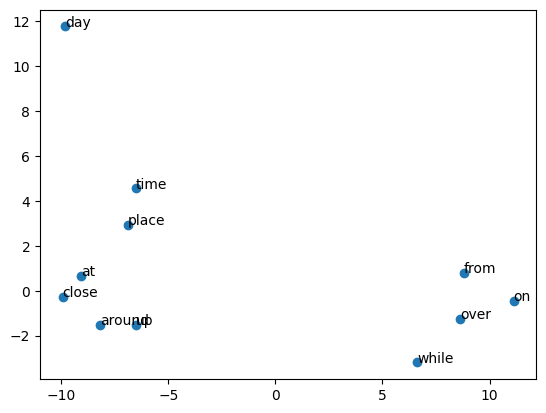

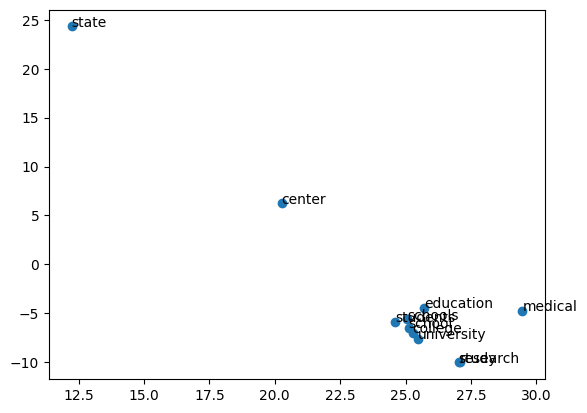

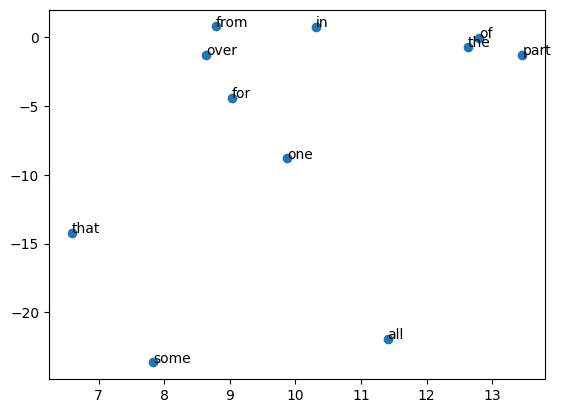

Not in sample set


In [ ]:
# Plot similar vectors on T-SNE
def plot_similar_vectors(word, n=10):
    similar_words = get_similar_words(word, n=n)
    indices = [list(glove_vectors.keys()).index(w) for w in similar_words + [word]]
    vectors = np.concatenate([glove_tsne[indices[:-1]], [glove_tsne[indices[-1]] + np.array([0, 0])]])
    x, y = vectors.T
    plt.scatter(x, y)
    for i, w in enumerate(similar_words + [word]):
        plt.annotate(w, (x[i], y[i]))
    plt.show()

# Example usage
for token in clean_tokens:
  try:
    plot_similar_vectors(token)
  except:
    print("Not in sample set")

In [ ]:
df = np.loadtxt('/content/glove.6B.100d.txt', usecols=range(1, 101), comments=None)

In [ ]:
df.shape

(400000, 100)

In [ ]:
df = df[399000:]

In [ ]:
glove = np.loadtxt('/content/glove.6B.100d.txt', dtype='str', comments=None)

words = glove[:, 0]
vectors = glove[:, 1:].astype('float')

In [ ]:
vectors.shape

(400000, 100)

In [ ]:
# result = x[5:]
vectors = vectors[399000:]

In [ ]:
vectors.shape

(1000, 100)

In [ ]:
words = words[399000:]

In [ ]:
words.shape

(1000,)

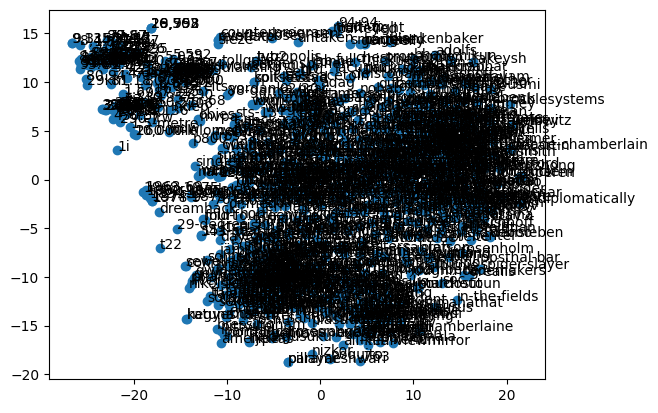

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word vectors using a scatter plot
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
#for i, word in enumerate(word_vectors.index_to_key):
for i,word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
plt.show()